This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. No rocket science involved, but still useful.

# Load some data

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10,True)
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [3]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [4]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [5]:
predictions = np.vstack(predictions)

In [8]:
predictions

array([[[ 0.        ,  0.02970297,  0.05940594, ...,  0.        ,
          0.00990099,  0.04950495],
        [ 0.        ,  0.03436426,  0.08247423, ...,  0.11340206,
          0.09278351,  0.21993127],
        [ 0.        ,  0.68224299,  0.        , ...,  0.        ,
          0.01869159,  0.01869159],
        ..., 
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.14110429,  0.        , ...,  0.01226994,
          0.3190184 ,  0.        ],
        [ 0.        ,  0.        ,  0.67605634, ...,  0.07042254,
          0.18309859,  0.        ]],

       [[ 0.00704225,  0.        ,  0.        , ...,  0.01408451,
          0.01408451,  0.42253521],
        [ 0.        ,  0.        ,  0.        , ...,  0.03773585,
          0.        ,  0.20754717],
        [ 0.01204819,  0.37751004,  0.15261044, ...,  0.00803213,
          0.12449799,  0.0562249 ],
        ..., 
        [ 0.80645161,  0.        ,  0.        , ...,

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [6]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [7]:
cum_mean

array([[[ 0.        ,  0.02970297,  0.05940594, ...,  0.        ,
          0.00990099,  0.04950495],
        [ 0.        ,  0.03436426,  0.08247423, ...,  0.11340206,
          0.09278351,  0.21993127],
        [ 0.        ,  0.68224299,  0.        , ...,  0.        ,
          0.01869159,  0.01869159],
        ..., 
        [ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.14110429,  0.        , ...,  0.01226994,
          0.3190184 ,  0.        ],
        [ 0.        ,  0.        ,  0.67605634, ...,  0.07042254,
          0.18309859,  0.        ]],

       [[ 0.00352113,  0.01485149,  0.02970297, ...,  0.00704225,
          0.01199275,  0.23602008],
        [ 0.        ,  0.01718213,  0.04123711, ...,  0.07556896,
          0.04639175,  0.21373922],
        [ 0.0060241 ,  0.52987652,  0.07630522, ...,  0.00401606,
          0.07159479,  0.03745824],
        ..., 
        [ 0.90322581,  0.        ,  0.        , ...,

**Step 5:** Get accuracy scores for each `n_estimators` value

In [9]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

In [10]:
scores

[0.5755555555555556,
 0.66000000000000003,
 0.68444444444444441,
 0.7466666666666667,
 0.76000000000000001,
 0.75555555555555554,
 0.80888888888888888,
 0.82222222222222219,
 0.82222222222222219,
 0.84444444444444444,
 0.86222222222222222,
 0.87333333333333329,
 0.88222222222222224,
 0.89111111111111108,
 0.88888888888888884,
 0.88444444444444448,
 0.88,
 0.87111111111111106,
 0.87111111111111106,
 0.87555555555555553,
 0.88444444444444448,
 0.89777777777777779,
 0.90000000000000002,
 0.89777777777777779,
 0.89777777777777779,
 0.89777777777777779,
 0.89555555555555555,
 0.89555555555555555,
 0.89777777777777779,
 0.90000000000000002,
 0.90222222222222226,
 0.90222222222222226,
 0.89555555555555555,
 0.90222222222222226,
 0.89777777777777779,
 0.89777777777777779,
 0.89555555555555555,
 0.89555555555555555,
 0.89333333333333331,
 0.90000000000000002,
 0.90222222222222226,
 0.90222222222222226,
 0.9044444444444445,
 0.90666666666666662,
 0.90666666666666662,
 0.90888888888888886,
 0.906

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

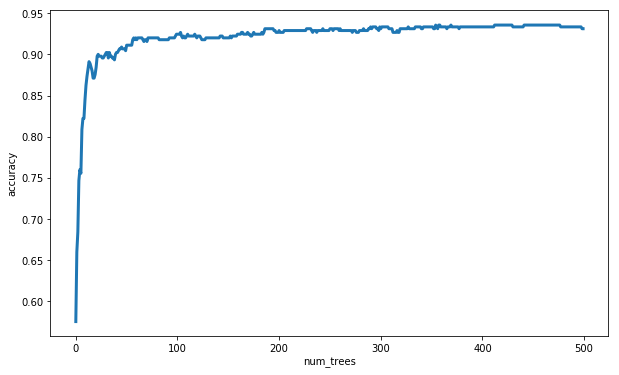

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.